In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
import pandas as pd
X=pd.read_csv("D:\Data Mining\Lab\Lab1\lab1\iris.csv")

In [54]:
X_std=StandardScaler().fit_transform(X)
print(X_std.shape)


(150, 4)


In [55]:
import numpy as np
mean_vec=np.mean(X_std)
cov_mat=((X_std).T.dot(X_std))/(X_std.shape[0]-1)
#cov_mat=((X_std).T.dot(X_std))
print("Covariance matrix\n  %s"%cov_mat)


Covariance matrix
  [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [56]:
print("Covariance matrix\n  %s"%np.cov(X_std.T))

Covariance matrix
  [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [82]:
eig_vals,eig_vecs = np.linalg.eig(cov_mat)
print("Eigen values\n  %s"%eig_vals)
print("Eigen vectors\n  %s"%eig_vecs)

Eigen values
  [2.93808505 0.9201649  0.14774182 0.02085386]
Eigen vectors
  [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [83]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
print('Eigenvectors in descending order:')
for i in eig_pairs:
    print(i[1])

Eigenvalues in descending order:
2.93808505019999
0.9201649041624861
0.1477418210449475
0.020853862176462144
Eigenvectors in descending order:
[ 0.52106591 -0.26934744  0.5804131   0.56485654]
[-0.37741762 -0.92329566 -0.02449161 -0.06694199]
[-0.71956635  0.24438178  0.14212637  0.63427274]
[ 0.26128628 -0.12350962 -0.80144925  0.52359713]


In [88]:
s = np.argsort(eig_vals)[::-1][:4] 
  

eigenvals = eig_vals[s]
eigenvecs = eig_vecs[:, s]

print(eigenvals)
print(eigenvecs)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [63]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [64]:
Y = X_std.dot(matrix_w)
print(Y[0:5,:])

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


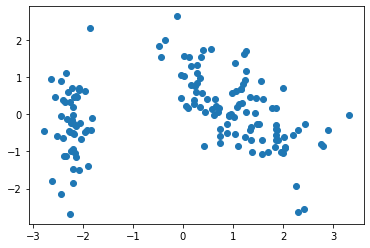

In [66]:
plt.scatter(Y[:,0],Y[:,1])

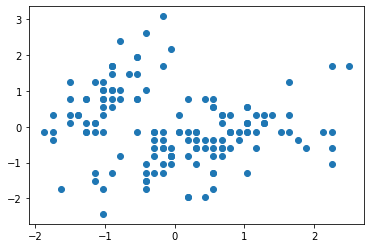

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_std[:,0],X_std[:,1])

In [60]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(X_std)

PCA(n_components=4)

In [61]:
print(pca.components_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [62]:
print(pca.explained_variance_)
print(pca.explained_variance_[0]/np.sum(pca.explained_variance_))
var_exp = [(i/np.sum(pca.explained_variance_)) for i in sorted(pca.explained_variance_, reverse=True)]
print('######')
print(var_exp)
print(pca.explained_variance_ratio_)

[2.93808505 0.9201649  0.14774182 0.02085386]
0.7296244541329987
######
[0.7296244541329987, 0.2285076178670177, 0.036689218892828744, 0.005178709107154799]
[0.72962445 0.22850762 0.03668922 0.00517871]
